In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import random

In [14]:
def build_checkerboard(w, h, square_size=3, color=0):
    '''
        Builds checkerboard up to size w and h in pixels using a square of size square_size.
        Optionally colors the background color.
    '''
    re = np.r_[ np.tile(np.hstack((color*np.ones((square_size, square_size)),
                  255*np.ones((square_size, square_size)))), w//square_size//2)]  # even-numbered rows
    ro = np.r_[ np.tile(np.hstack((255*np.ones((square_size, square_size)),
                  color*np.ones((square_size, square_size)))), w//square_size//2) ]    # odd-numbered rows
    return np.row_stack(h//square_size*(re, ro))


def angle_deform(img, theta, up_y, low_y, right_x, left_x):
    '''
        Does a perspective transform according to an angle shift away from the plane of the image. See figure in
        report for details
    '''
    theta_r = theta * math.pi / 180.0
    
    # Original rectangle of the checkboard unwarped
    rect1 = np.array([[left_x, up_y],
        [right_x, up_y],
        [right_x, low_y],
        [left_x, low_y]], dtype='float32')

    h = 0.12
    w = right_x - left_x

    # The end goal quadliterateral for the shape of the checkerboard
    rect2 = np.array([[left_x+w*(1-math.cos(theta_r)), up_y+h*w*math.sin(theta_r)],
        [right_x, up_y],
        [right_x, low_y],
        [left_x+w*(1-math.cos(theta_r)), low_y-h*w*math.sin(theta_r)]], dtype='float32')

    M = cv2.getPerspectiveTransform(rect1, rect2)

    return cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))


def create_img(img_dim, blur_level=0, base_color=0, view_angle=0):
    ''' 
        Creates checkboard image give the dimensoins and cue parameters.
        Image dimensions must be a multiple of 16
    '''
    img = np.ones(img_dim)*base_color
    
    h, w = img_dim
    square_size = h//16
    check_half_h = square_size*5
    checkboard = build_checkerboard(w, check_half_h, square_size, color=base_color)
    
    low_y = h//2 + check_half_h
    up_y = low_y - check_half_h*2
    left_x, right_x = 0, w
        
    img[up_y:low_y, left_x:right_x] = checkboard
    
    if blur_level > 0:
        img = cv2.blur(img, (blur_level, blur_level), borderType=cv2.BORDER_REPLICATE)
        
    if view_angle > 0:
        img = angle_deform(img, view_angle, up_y, low_y, right_x, left_x)
    img[img == 0] = base_color
    
    return img

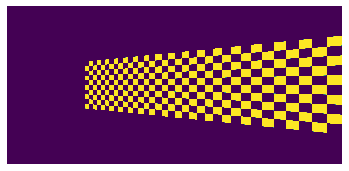

In [15]:
# Test creating image with different parameters
blur = 0
angle = 40
color = 0

img = create_img((2048, 4352), blur, color, angle)

fig = plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()
fig.savefig('image_blur{blur}_angle{angle}_color{color}.png'.format(blur=blur, angle=angle, color=color), transparent=True, bbox_inches='tight')

In [16]:
# Select the set of parameters to build the dataset for
blurs = [0, 120, 220]
angles = [20, 40, 60]
colors = [0, 200, 245]

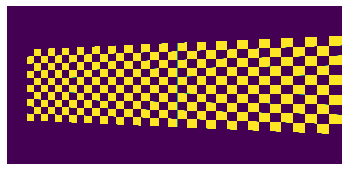

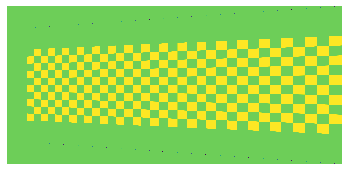

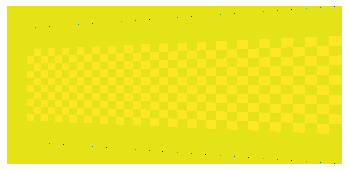

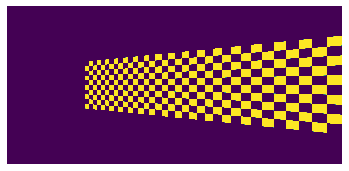

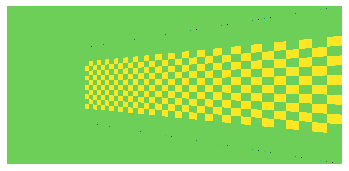

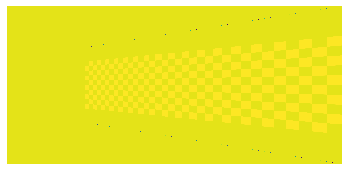

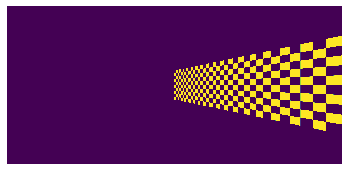

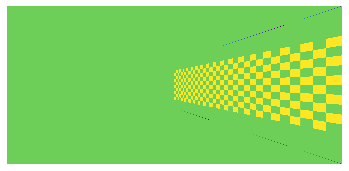

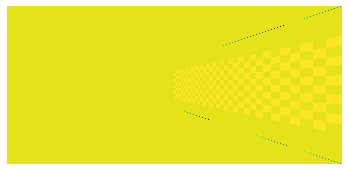

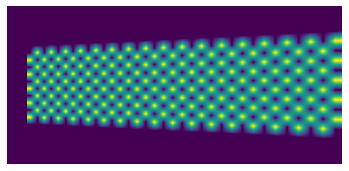

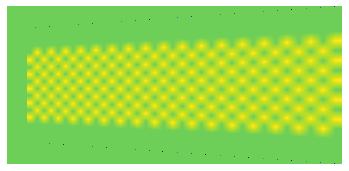

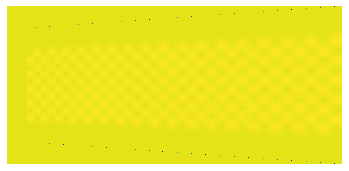

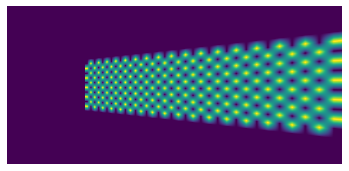

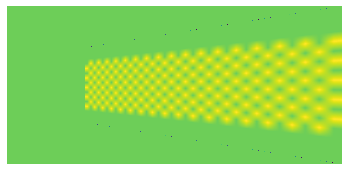

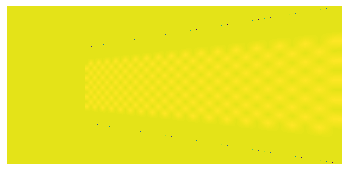

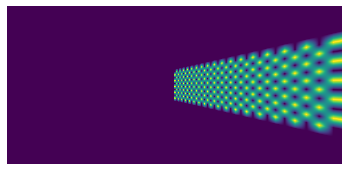

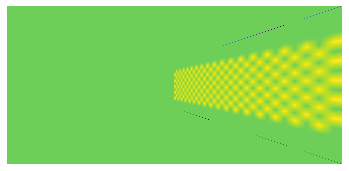

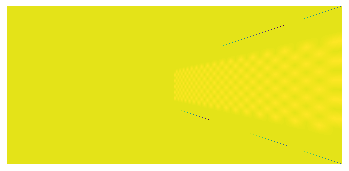

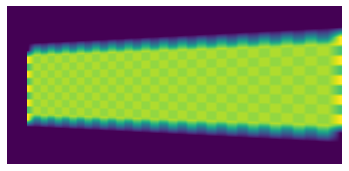

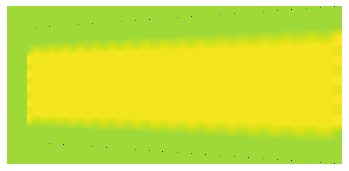

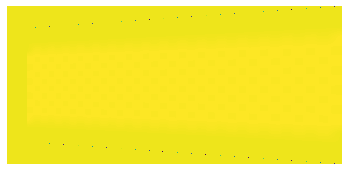

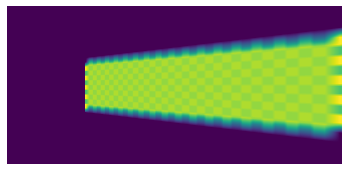

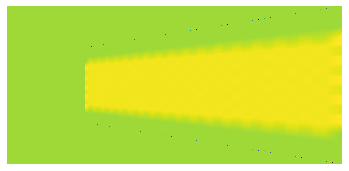

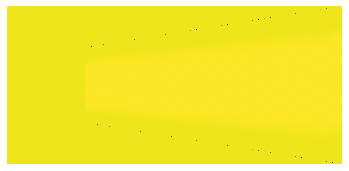

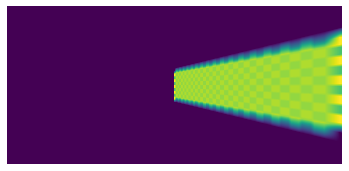

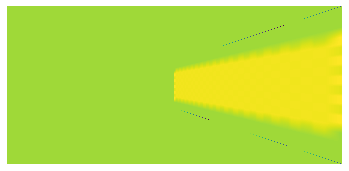

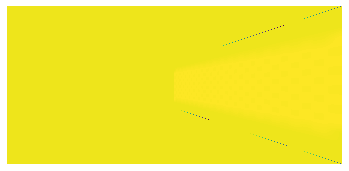

In [17]:
# Create all the images for the experiment and save the to a folder.
name_list = []
for blur in blurs:
    for angle in angles:
        for color in colors:
            # The image dimensions must be an even multiple of 16
            img = create_img((2048, 4352), blur, color, angle)

            fig = plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
#             name = 'test_images/image_blur{blur}_angle{angle}_color{color}.png'.format(blur=blur, angle=angle, color=color)
#             name_list.append(name)
#             fig.savefig(name)
        
            name = '../Figures/dataset/image_blur{blur}_angle{angle}_color{color}_tight.png'.format(blur=blur, angle=angle, color=color)
            name_list.append(name)
            fig.savefig(name, transparent=True, bbox_inches='tight')

In [6]:
tests = {} 
person = 1

In [85]:
# Selects a subset of all the images to display each test subject

def test_generator(size=9):
    global person
    out = random.sample(name_list, 9)
    tests["Person {num}".format(num=person)] = out
    print(person)

    person += 1
    
test_generator()

print(tests)

50
{'Person 1': ['test_images/image_blur120_angle40_color245.png', 'test_images/image_blur220_angle20_color245.png', 'test_images/image_blur120_angle40_color0.png', 'test_images/image_blur220_angle60_color200.png', 'test_images/image_blur120_angle40_color200.png', 'test_images/image_blur220_angle60_color0.png', 'test_images/image_blur220_angle40_color0.png', 'test_images/image_blur0_angle60_color245.png', 'test_images/image_blur220_angle20_color0.png'], 'Person 2': ['test_images/image_blur220_angle60_color0.png', 'test_images/image_blur0_angle40_color200.png', 'test_images/image_blur120_angle60_color200.png', 'test_images/image_blur0_angle40_color245.png', 'test_images/image_blur120_angle20_color245.png', 'test_images/image_blur220_angle40_color0.png', 'test_images/image_blur0_angle60_color0.png', 'test_images/image_blur220_angle20_color245.png', 'test_images/image_blur120_angle40_color0.png'], 'Person 3': ['test_images/image_blur120_angle20_color0.png', 'test_images/image_blur0_angle4

In [8]:
# Make juptyer notebook wider for displaying images during test

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

['test_images/image_blur220_angle40_color245.png', 'test_images/image_blur120_angle20_color0.png', 'test_images/image_blur0_angle20_color245.png', 'test_images/image_blur0_angle40_color0.png', 'test_images/image_blur120_angle20_color200.png', 'test_images/image_blur0_angle60_color245.png', 'test_images/image_blur120_angle60_color0.png', 'test_images/image_blur120_angle40_color245.png', 'test_images/image_blur220_angle60_color245.png']
test_images/image_blur220_angle40_color245.png






<Figure size 432x288 with 0 Axes>

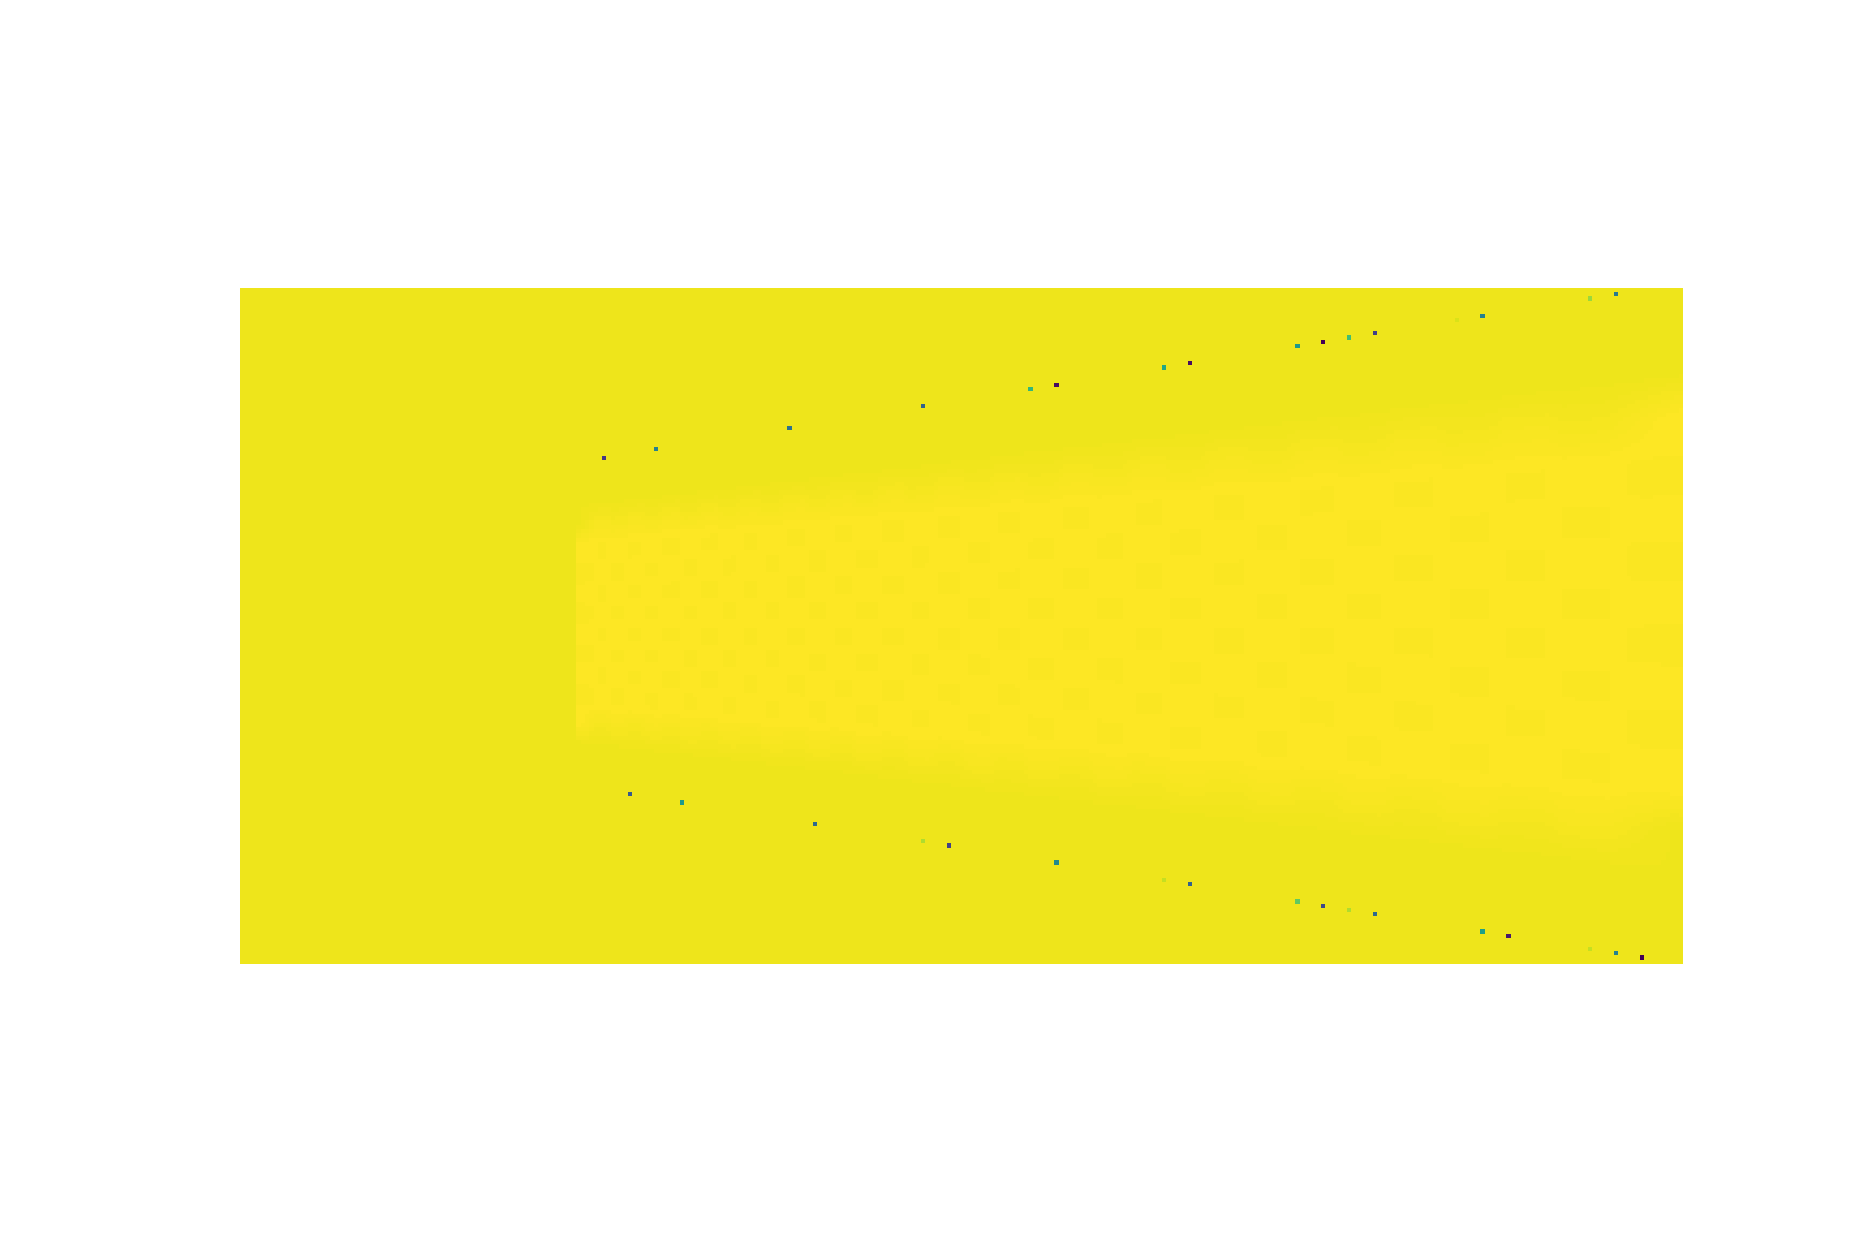

test_images/image_blur120_angle20_color0.png






<Figure size 432x288 with 0 Axes>

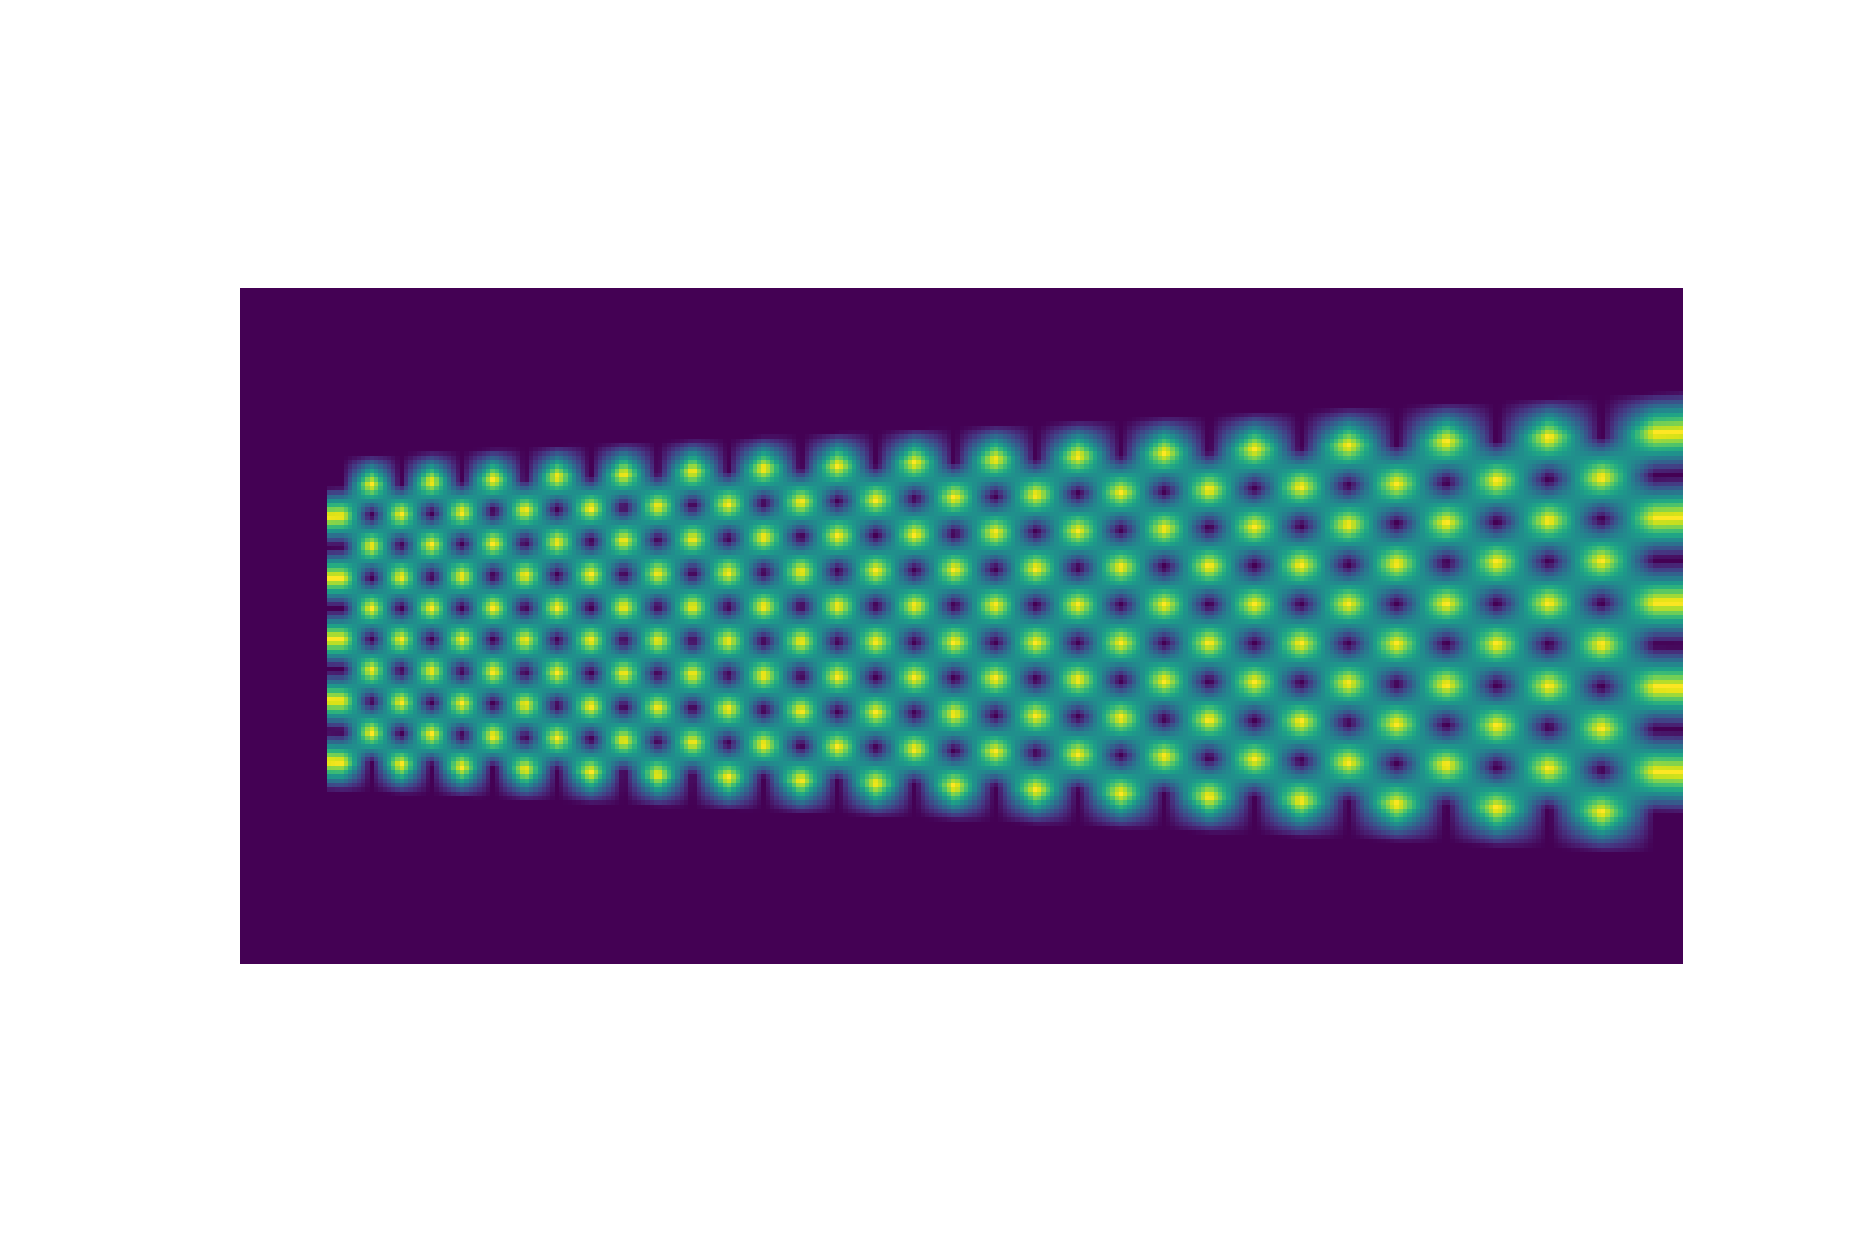

test_images/image_blur0_angle20_color245.png






<Figure size 432x288 with 0 Axes>

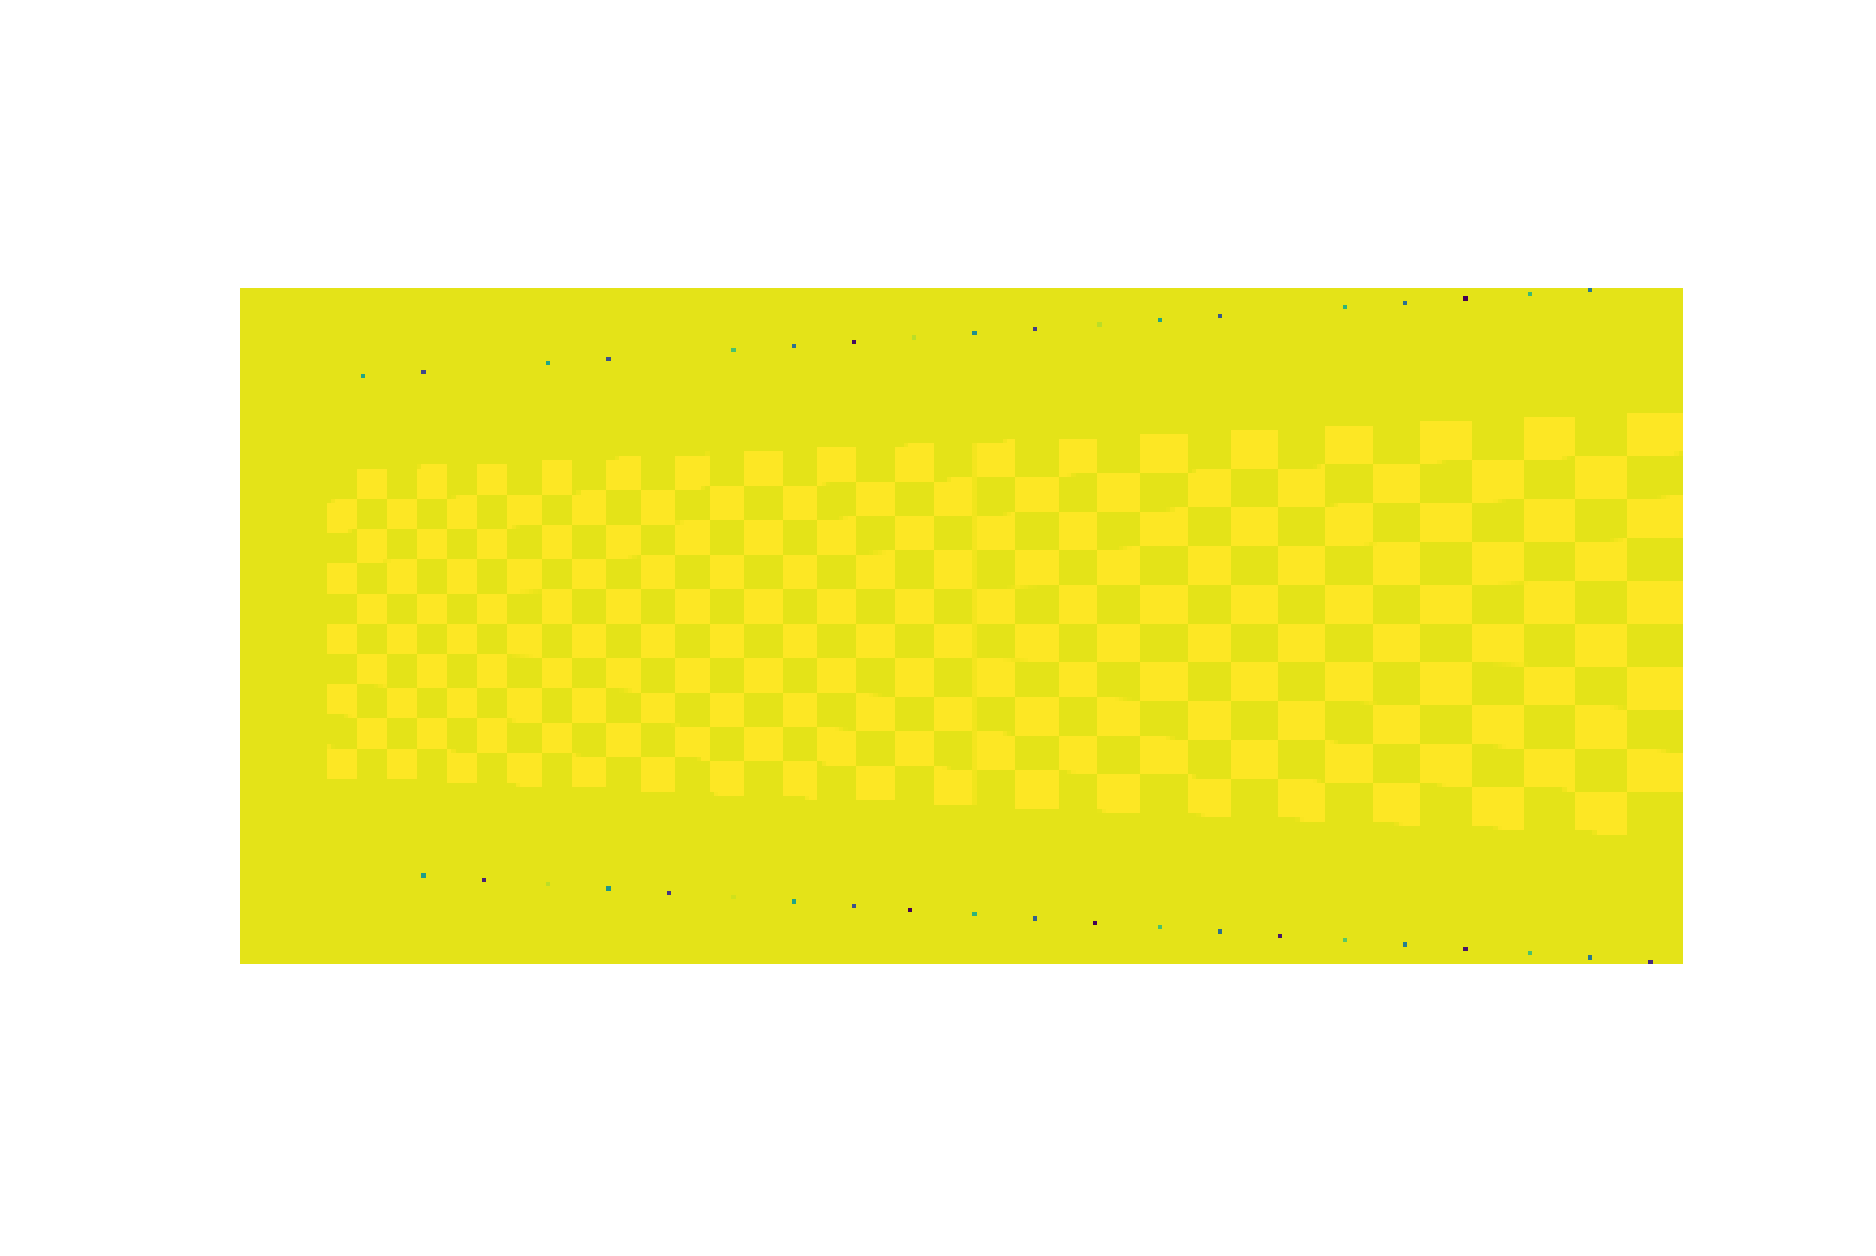

test_images/image_blur0_angle40_color0.png






<Figure size 432x288 with 0 Axes>

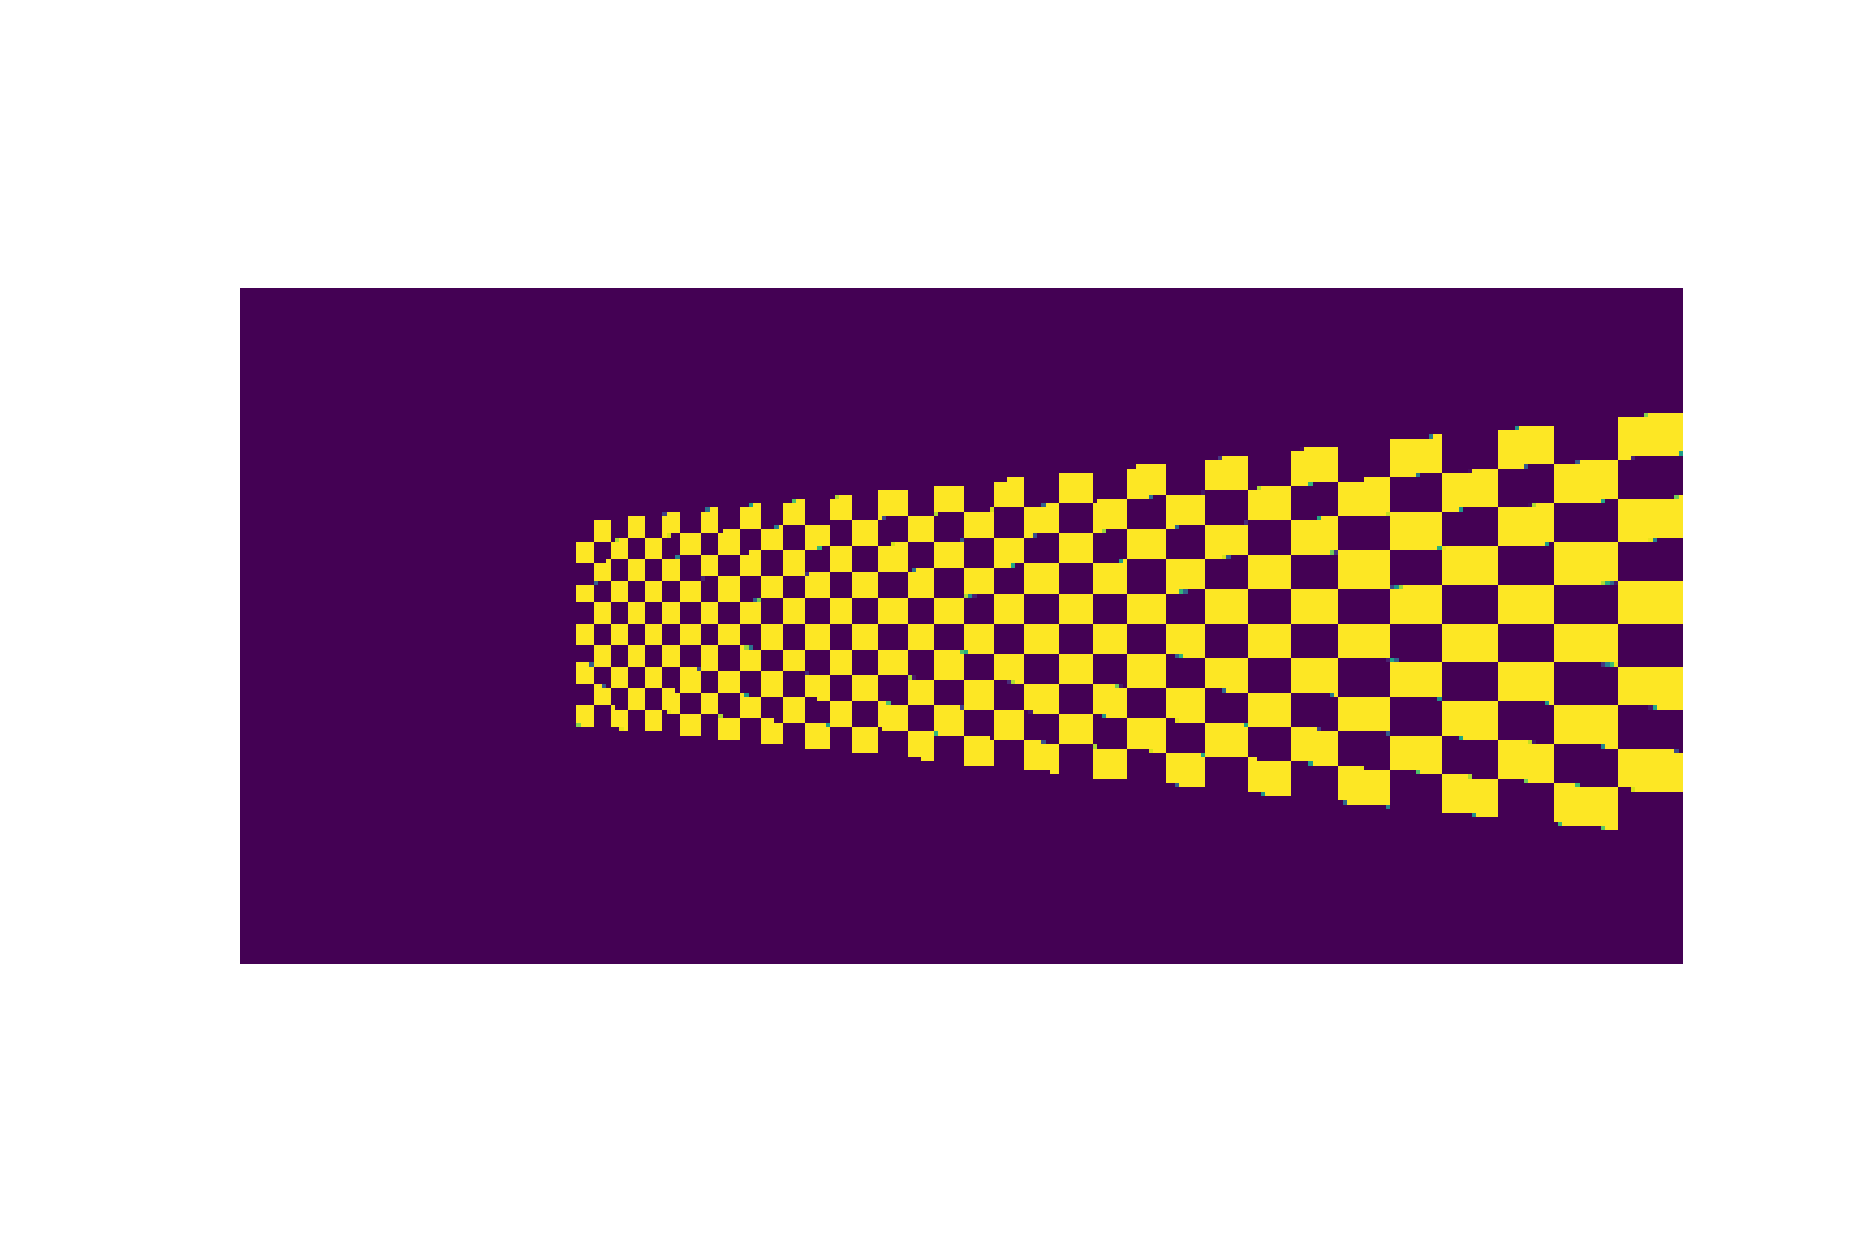

test_images/image_blur120_angle20_color200.png






<Figure size 432x288 with 0 Axes>

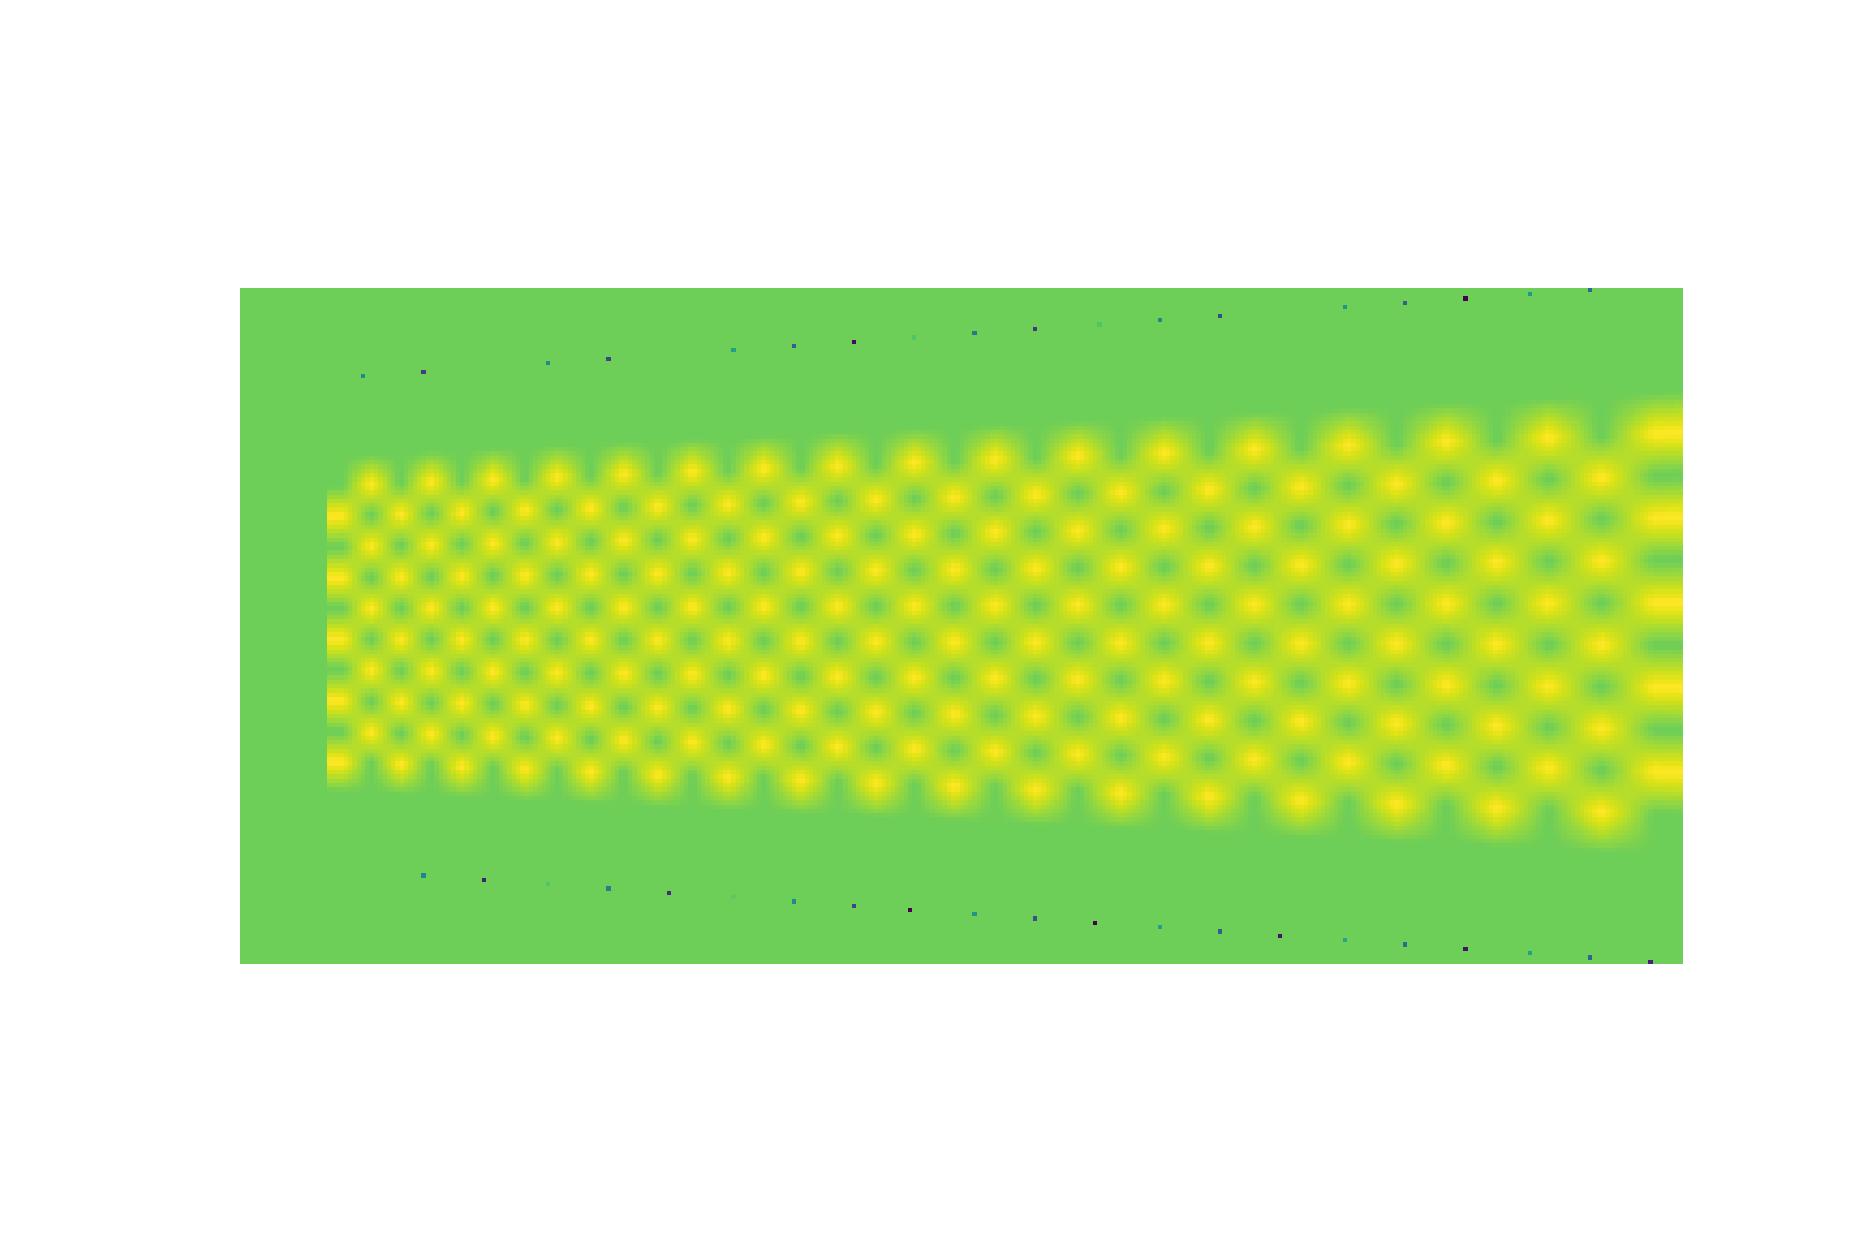

test_images/image_blur0_angle60_color245.png






<Figure size 432x288 with 0 Axes>

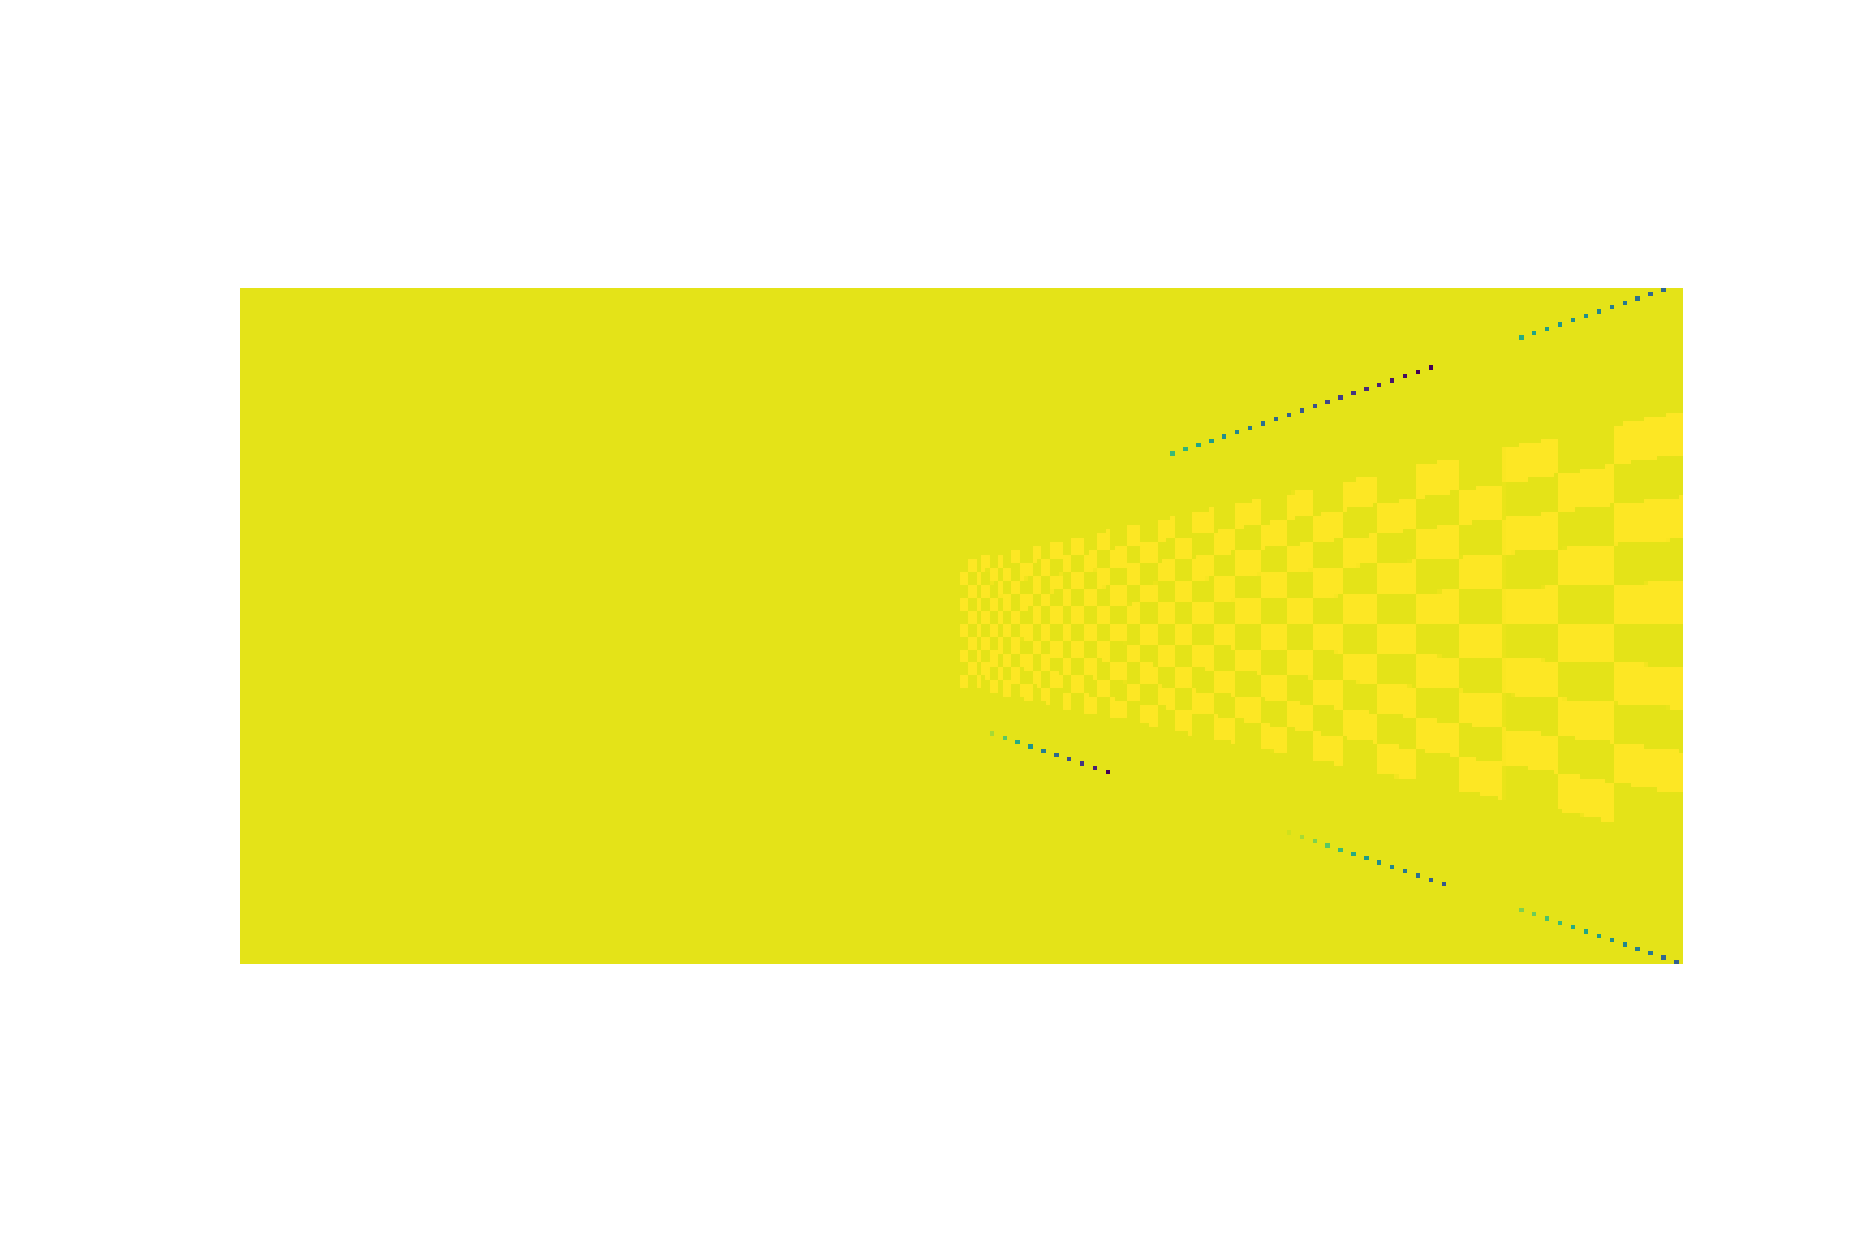

test_images/image_blur120_angle60_color0.png






<Figure size 432x288 with 0 Axes>

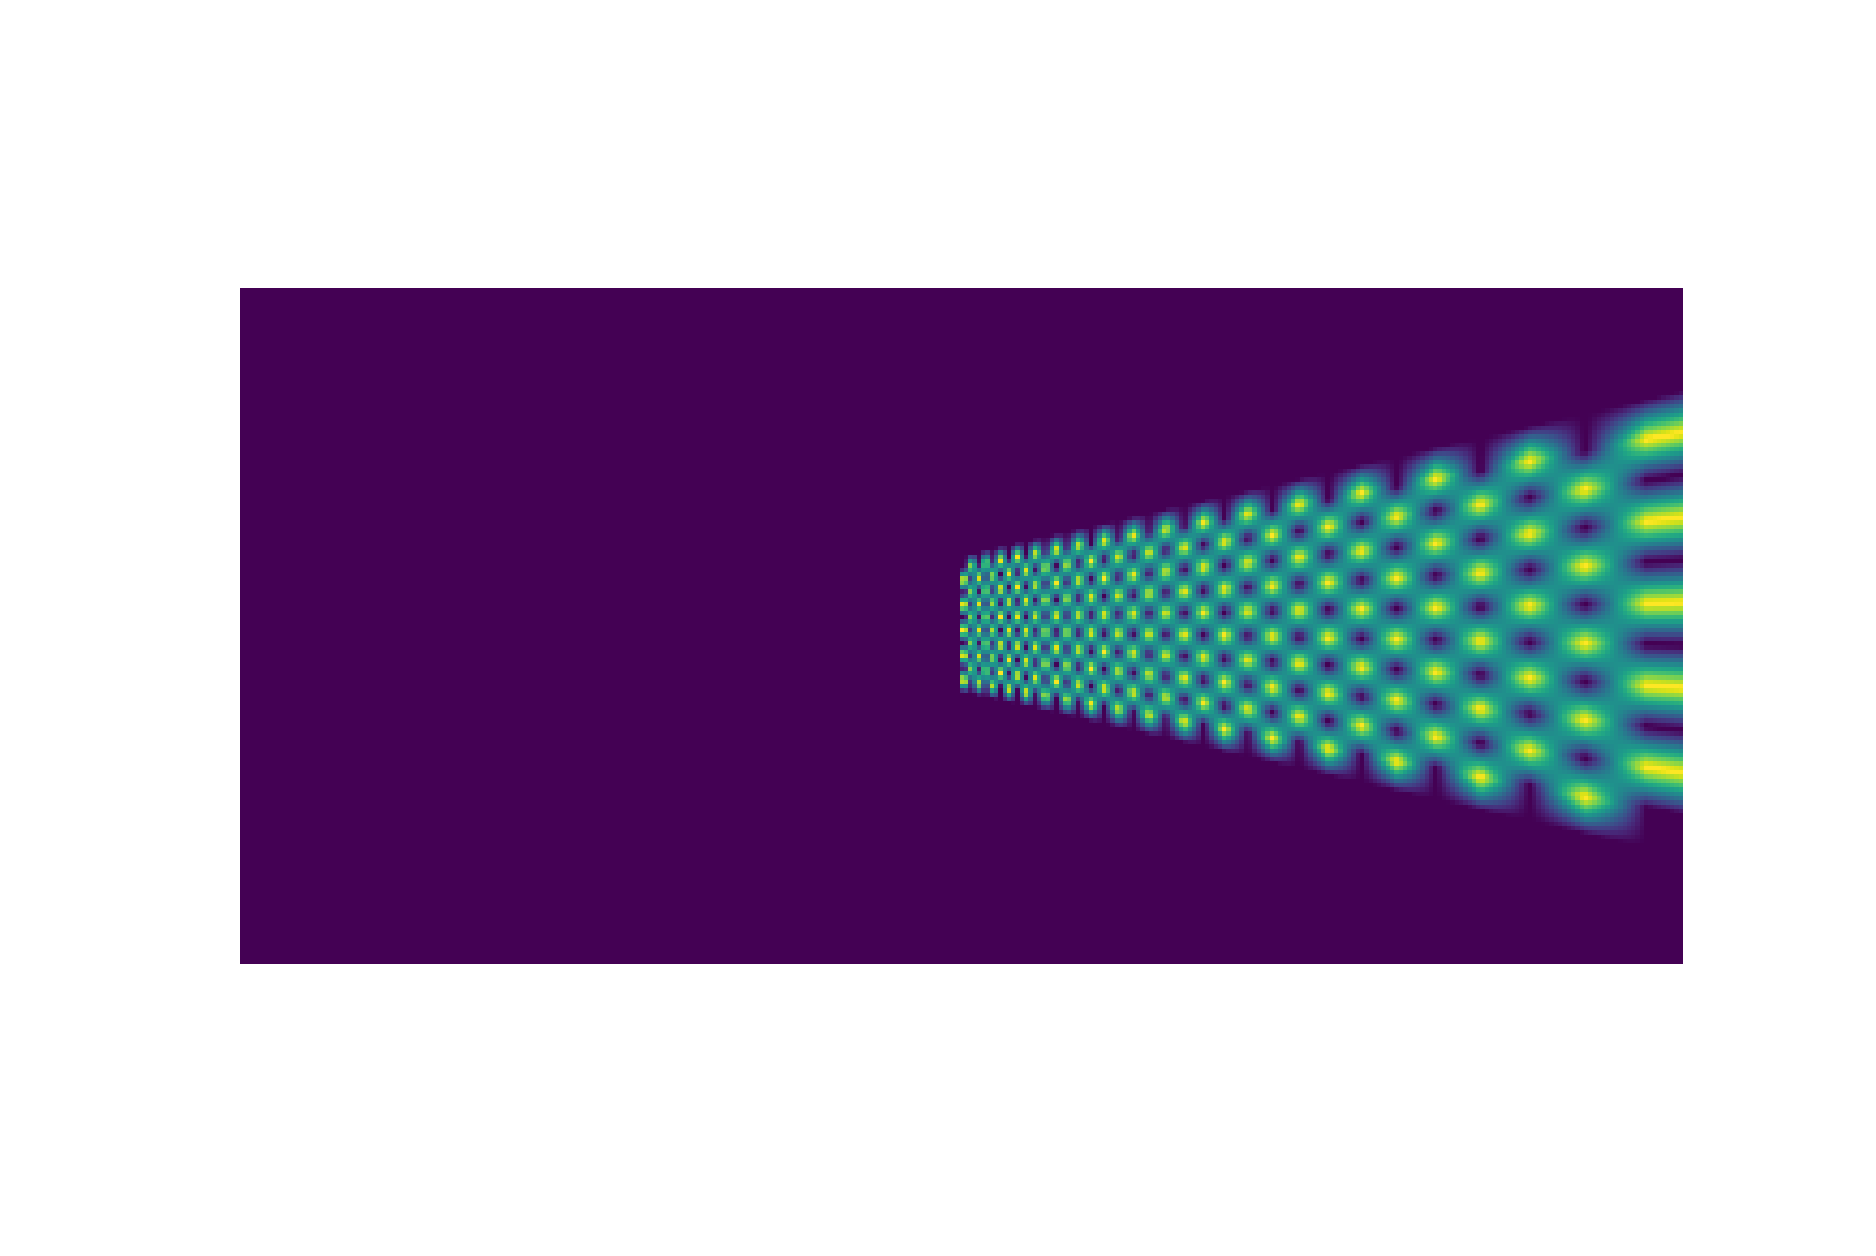

test_images/image_blur120_angle40_color245.png






<Figure size 432x288 with 0 Axes>

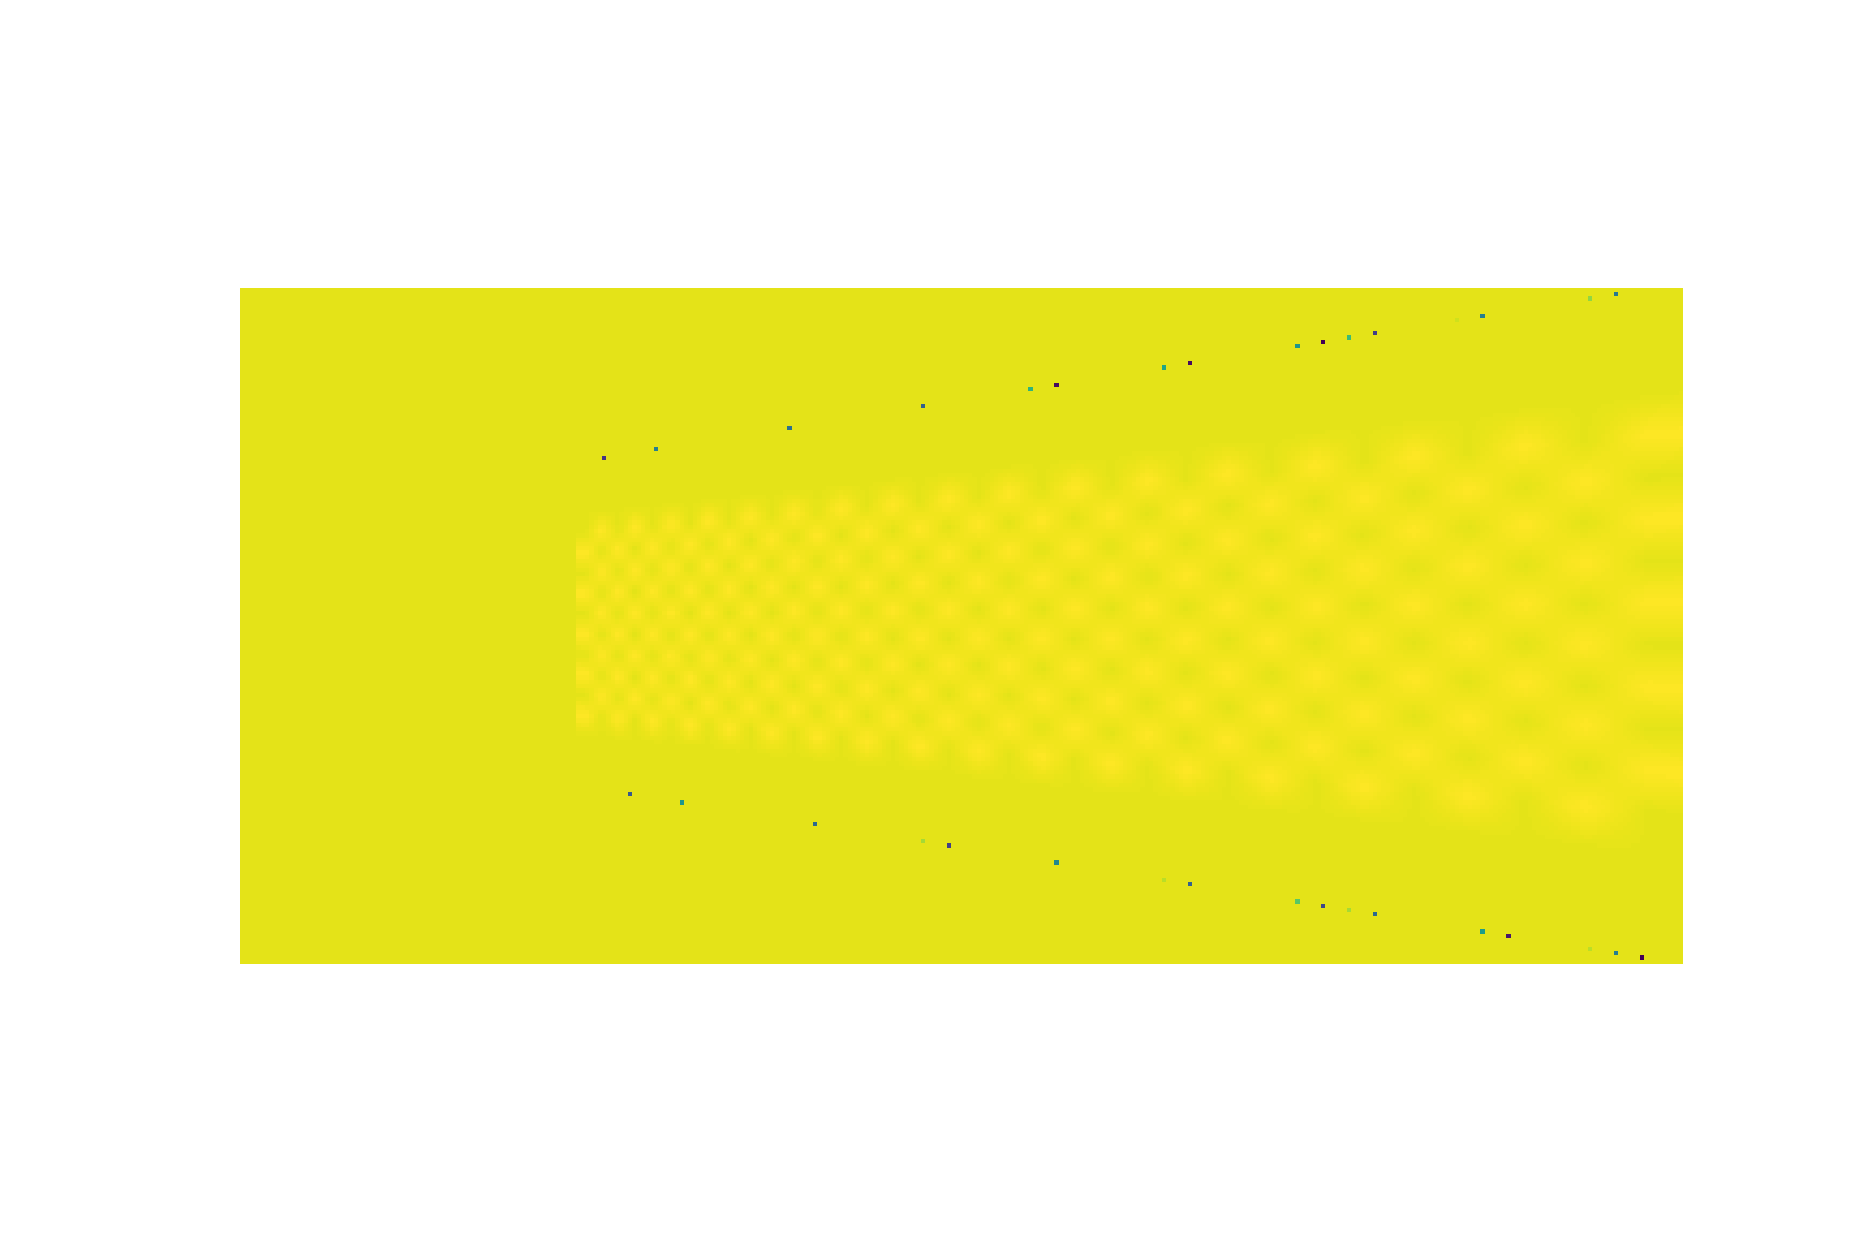

test_images/image_blur220_angle60_color245.png






<Figure size 432x288 with 0 Axes>

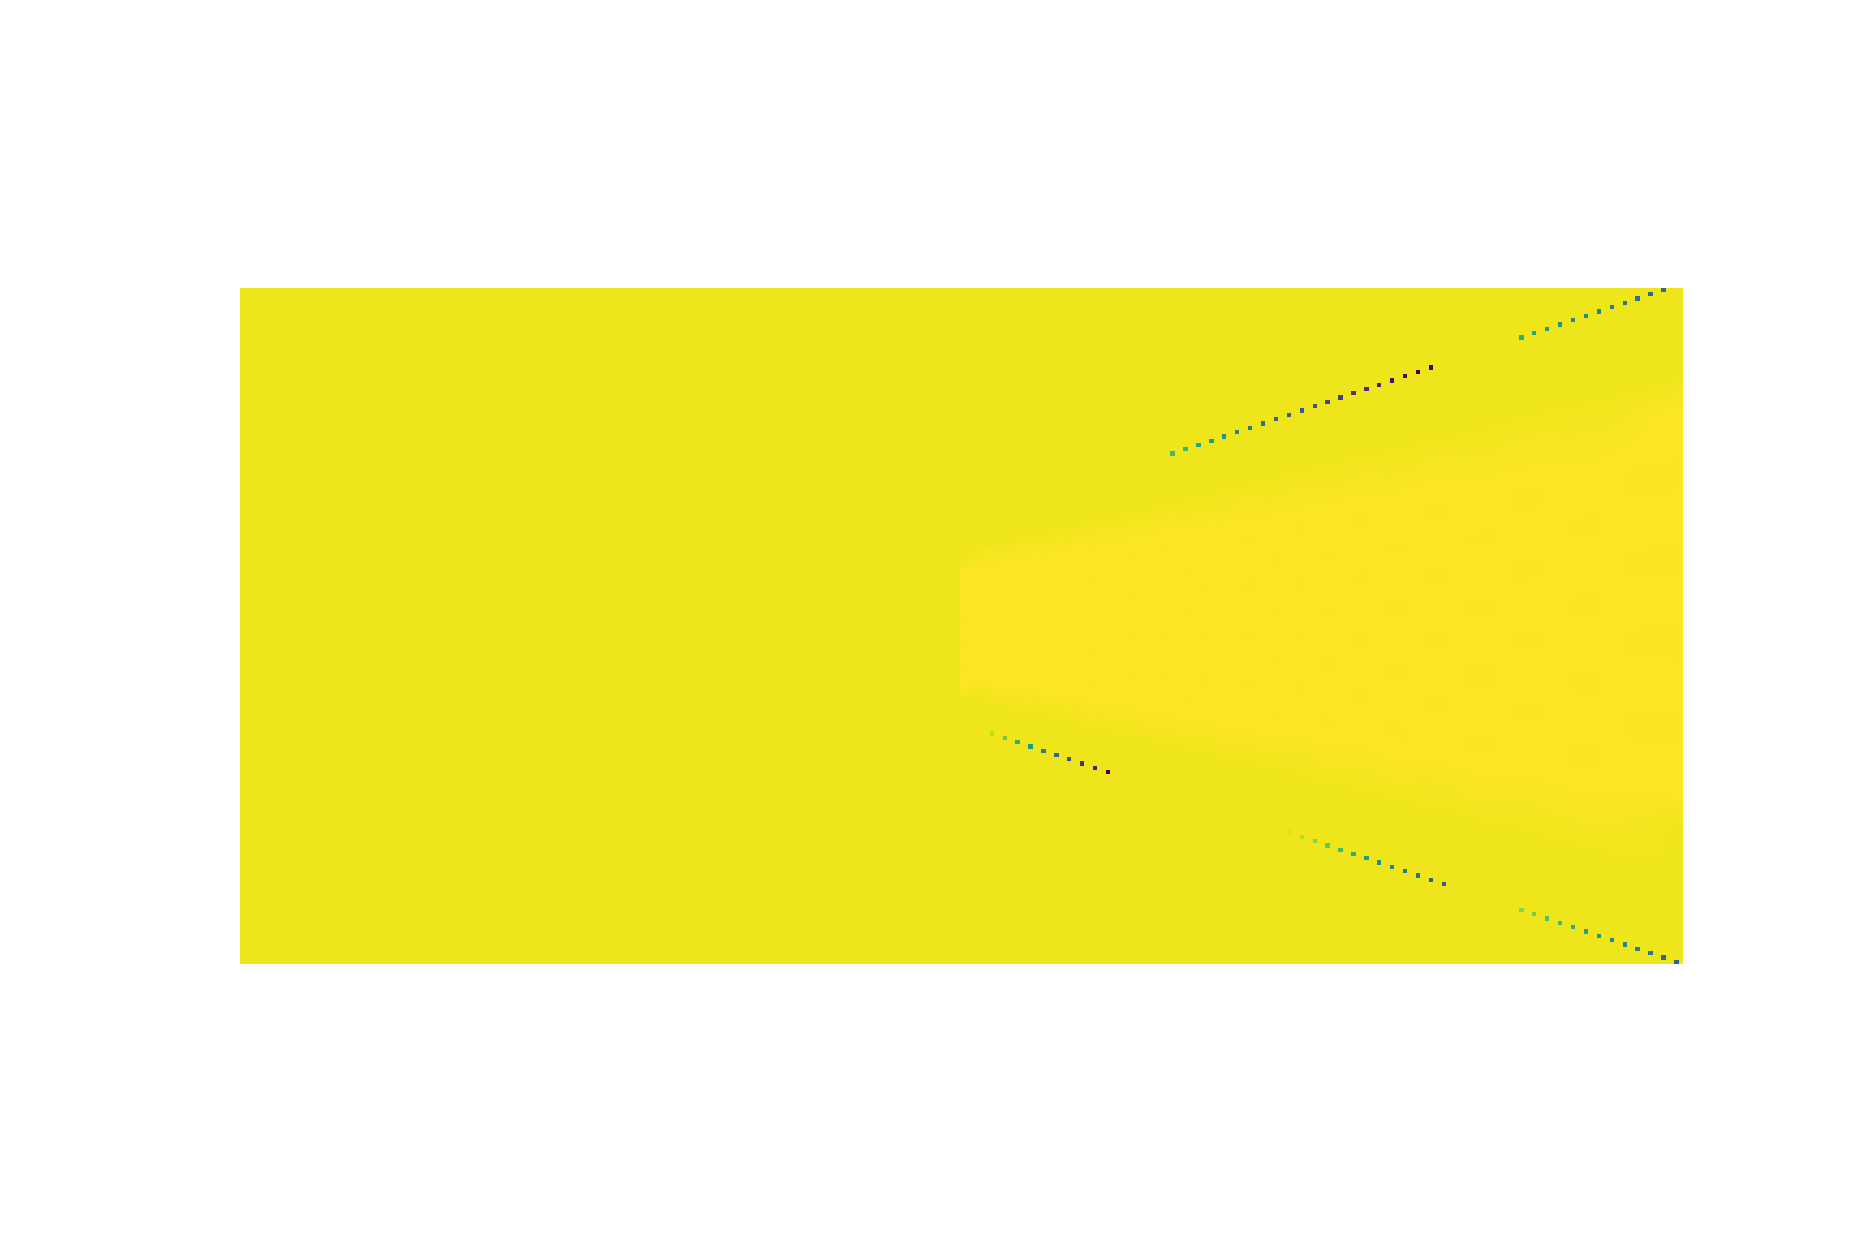

In [117]:
# Display all the images for a test subject

images = tests["Person 19"]

print(images)

for image in images:
    fig = plt.figure()
    plt.figure(figsize=(30, 50), dpi=80)
    print(image + "\n\n\n\n")
    img = plt.imread(image)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [106]:
# Creates a csv template for each data collection.  For each person, the column is labelled with the images they will be asked about
# and the order in which they come, such that you don't have to search for row each time.

import csv

ofile  = open('dataset_template.csv', "w")
writer = csv.writer(ofile, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)

header = ['blur', 'angle', 'color']
for person in tests:
    header.append(person)
print(header)
writer.writerow(header)

for i, blur in enumerate(blurs):
    for j, angle in enumerate(angles):
        for k, color in enumerate(colors):
            name = 'test_images/image_blur{blur}_angle{angle}_color{color}.png'.format(blur=blur, angle=angle, color=color)
            print(9*i+3*j+k+1, name)
            line = [blur, angle, color]
            for person in tests:
#                 print(tests[person])
                try:
                    line.append(tests[person].index(name)+1)
                except ValueError:
                    line.append('')
            print(line)
            writer.writerow(line)
            
ofile.close()

['blur', 'angle', 'color', 'Person 1', 'Person 2', 'Person 3', 'Person 4', 'Person 5', 'Person 6', 'Person 7', 'Person 8', 'Person 9', 'Person 10', 'Person 11', 'Person 12', 'Person 13', 'Person 14', 'Person 15', 'Person 16', 'Person 17', 'Person 18', 'Person 19', 'Person 20', 'Person 21', 'Person 22', 'Person 23', 'Person 24', 'Person 25', 'Person 26', 'Person 27', 'Person 28', 'Person 29', 'Person 30', 'Person 31', 'Person 32', 'Person 33', 'Person 34', 'Person 35', 'Person 36', 'Person 37', 'Person 38', 'Person 39', 'Person 40', 'Person 41', 'Person 42', 'Person 43', 'Person 44', 'Person 45', 'Person 46', 'Person 47', 'Person 48', 'Person 49', 'Person 50']
1 test_images/image_blur0_angle20_color0.png
[0, 20, 0, '', '', '', '', '', '', '', '', '', '', '', 8, 3, 6, 7, '', 7, 7, '', '', '', '', 5, '', '', 9, '', '', 1, '', '', 7, '', '', '', 1, 9, '', 3, 7, 7, '', '', '', '', '', '', '', 7, 3]
2 test_images/image_blur0_angle20_color200.png
[0, 20, 200, '', '', 6, '', '', '', 7, 6, '', 